# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20 , 10) #to fix the size of the ploting figure

# importing the data set 

In [3]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# data Set preprocessing

In [6]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
#data_set.groupby('area_type')['area_type'].agg('count')

#another method to check for the unique area type counts with the help of unique function

df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Here taking the assumtion that area type , availablity , and society are redundant features..here we will drop those columns which we consider to be non useful for our prediction of the house price

In [8]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'] , axis= 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.shape

(13320, 5)

# Data Cleaning

handling the NA values

In [10]:
df2.isnull().sum() #this gives us the values of tuples having these attributes with NA values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna() #this will drop those tuples which are having NA values in any of the attribute

In [12]:
df3.shape

(13246, 5)

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3['size'].unique() #the ambigous statements in size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

Add new feature(interger) for the BHK 

In [15]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#this here we are spliting the size column and spliting in a list of various data types here it will be 2BHK = 2 + 'BHK' and hence here we are only taking the first element the numerical value in new column 


C:\Users\DELL\AppData\Local\Temp\ipykernel_13732\3362413611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3[df3['BHK'] > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

the function is used to check if the value can be a float or not 
it takes a string value and if possible to convert in float then goes in try else return false

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3.total_sqft.apply(is_float)].head() # here this query is giving me the tuples which either are in range or something else

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [21]:
def convert_the_sqft_to_float(x):
    token = x.split('-') #this will convert the whole string according to the
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2 #the data was either a range or in some other string format so with if condition id data is in range form then we can convert it to the avg of that range
    try:
        return float(x) #the data is in string format hence this will convert it to float directly and ensures as with the string as a numerical value
    except:
        return None #here i can also use some methods to convert the sqmtr or pounds to sqft but in this project currently removing these kinds of data

In [22]:
convert_the_sqft_to_float('2100-2850')

2475.0

In [23]:
# df3.total_sqft = df3.total_sqft.apply(convert_the_sqft_to_float)

#the above code gives a warning of creating the copy of the data frame so to remove that warning or for good practice we should create the copy of the df on our own and apply our requirements

df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_the_sqft_to_float)
df4 = df4[df4.total_sqft.notnull()]
df4.shape

(13200, 6)

In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [25]:
df5 = df4.drop(['size'] , axis= 'columns')
df5['price_per_sqft'] = df5.price*100000/df5.total_sqft
df5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5.price.describe()

count    13200.000000
mean       112.276178
std        149.175995
min          8.000000
25%         50.000000
50%         71.850000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [27]:
df5.to_csv('bhp.csv' , index = False)

In [28]:
df5.location = df5.location.apply(lambda x : x.strip())
#the above query will remove all the blacnk spacing the location column at starting and at ending of the cell stirng
location_stats = df5['location'].value_counts(ascending = False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [29]:
len(df5.location.unique())

1287

In [30]:
len(location_stats[location_stats <= 10])

1047

# Dimensionality reduction

Any Location having less than 10 data points sohuld be tagged as 'Other' location.This way number of catgories can be reduced by huge amount.Later on when we do one hot encoding, it will help us with fewer dummy columns

In [31]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [32]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [33]:
df5.shape

(13200, 6)

In [34]:
other_rows = df5[df5.location == 'other']
other_rows

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.00,6,36274.509804
18,other,2770.0,4.0,290.00,3,10469.314079
19,other,1100.0,2.0,48.00,2,4363.636364
25,other,1250.0,3.0,56.00,3,4480.000000
42,other,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...
13291,other,812.0,1.0,26.00,1,3201.970443
13292,other,1440.0,2.0,63.93,3,4439.583333
13302,other,1075.0,2.0,48.00,2,4465.116279
13306,other,1200.0,5.0,325.00,4,27083.333333


# Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [35]:
len(df5.location.unique())

241

In [36]:
df5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [37]:
df5[df5.total_sqft/df5.BHK < 300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [38]:
df6 = df5[~(df5.total_sqft/df5.BHK < 300)] #taking the consideration of each room of atleast 300 sqft in area
df6.shape

(12456, 6)

## Outlier Removal Using Standard Deviation and Mean

In [39]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [40]:
def remove_ppl_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index=True)
    return df_out

In [41]:
df7 = remove_ppl_outliers(df6)
df7.shape

(10242, 6)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [42]:
def plot_scatter_chart(df , location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15 , 10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color ='blue' , label='2 BHK' ,s=50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,color='green' , label ='3 BHK', s=50)
    plt.xlabel("Total Sqaure Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

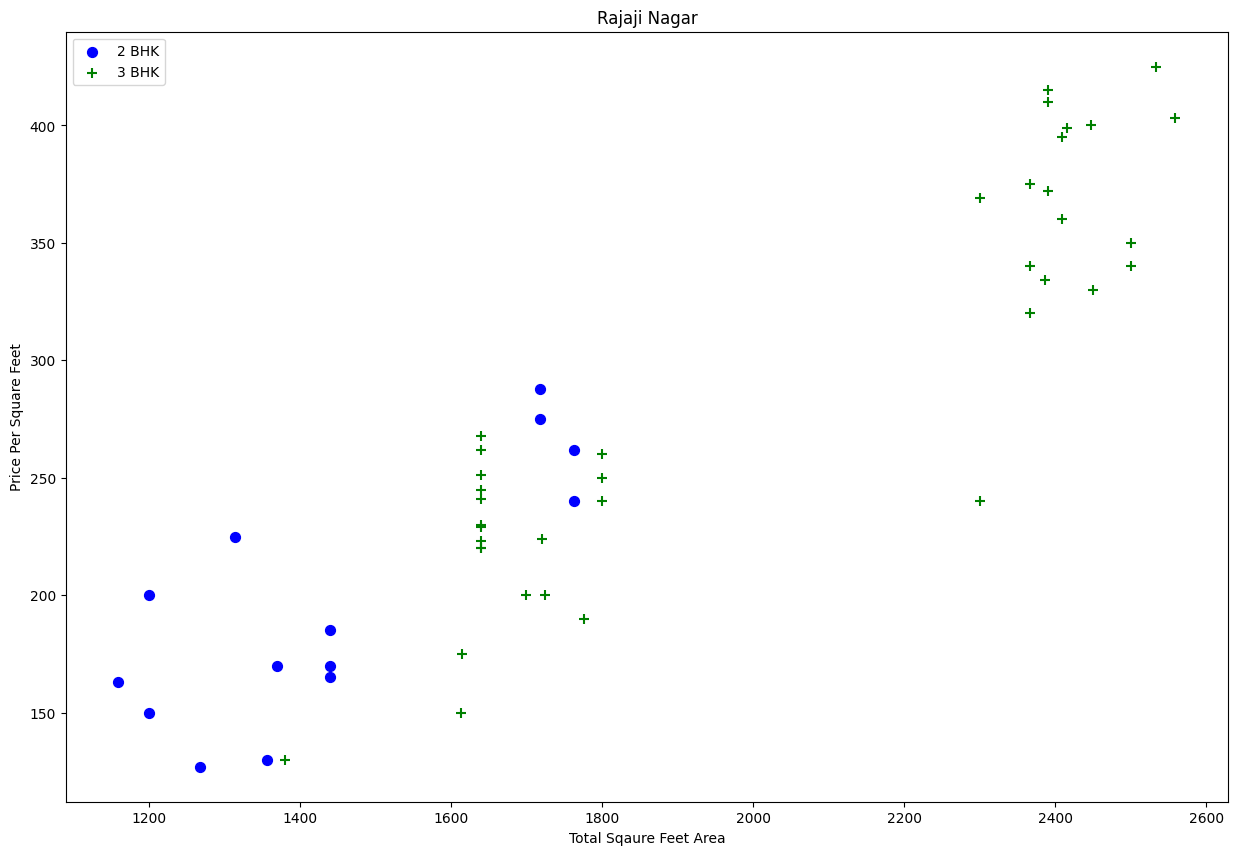

In [43]:
plot_scatter_chart(df7 , 'Rajaji Nagar')

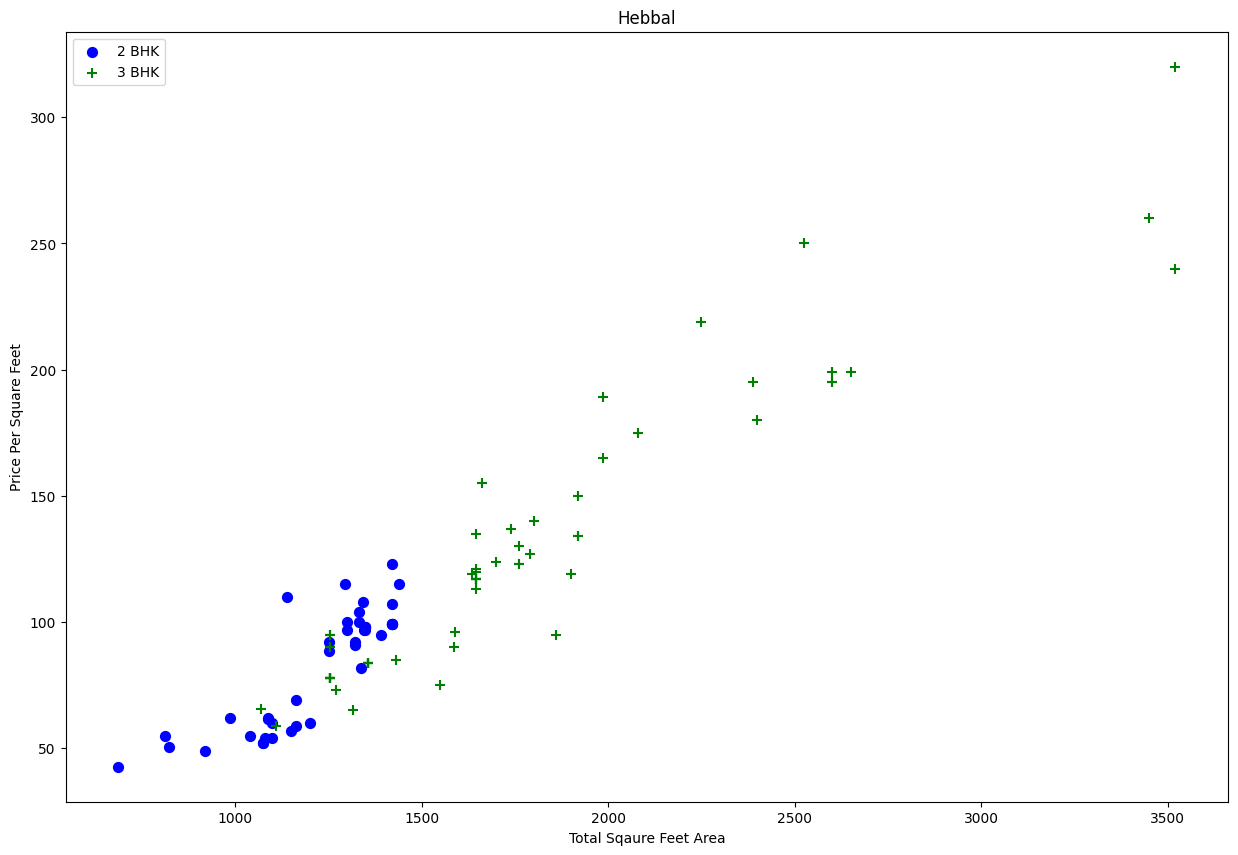

In [44]:
plot_scatter_chart(df7 , 'Hebbal')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
/*
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
*/
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:
def remove_bhk_outliers(df):
    exculde_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'Std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exculde_indices = np.append(exculde_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])]. index.values)
    return df.drop(exculde_indices , axis = 'index')

df8= remove_bhk_outliers(df7)
df8.shape

(7317, 6)

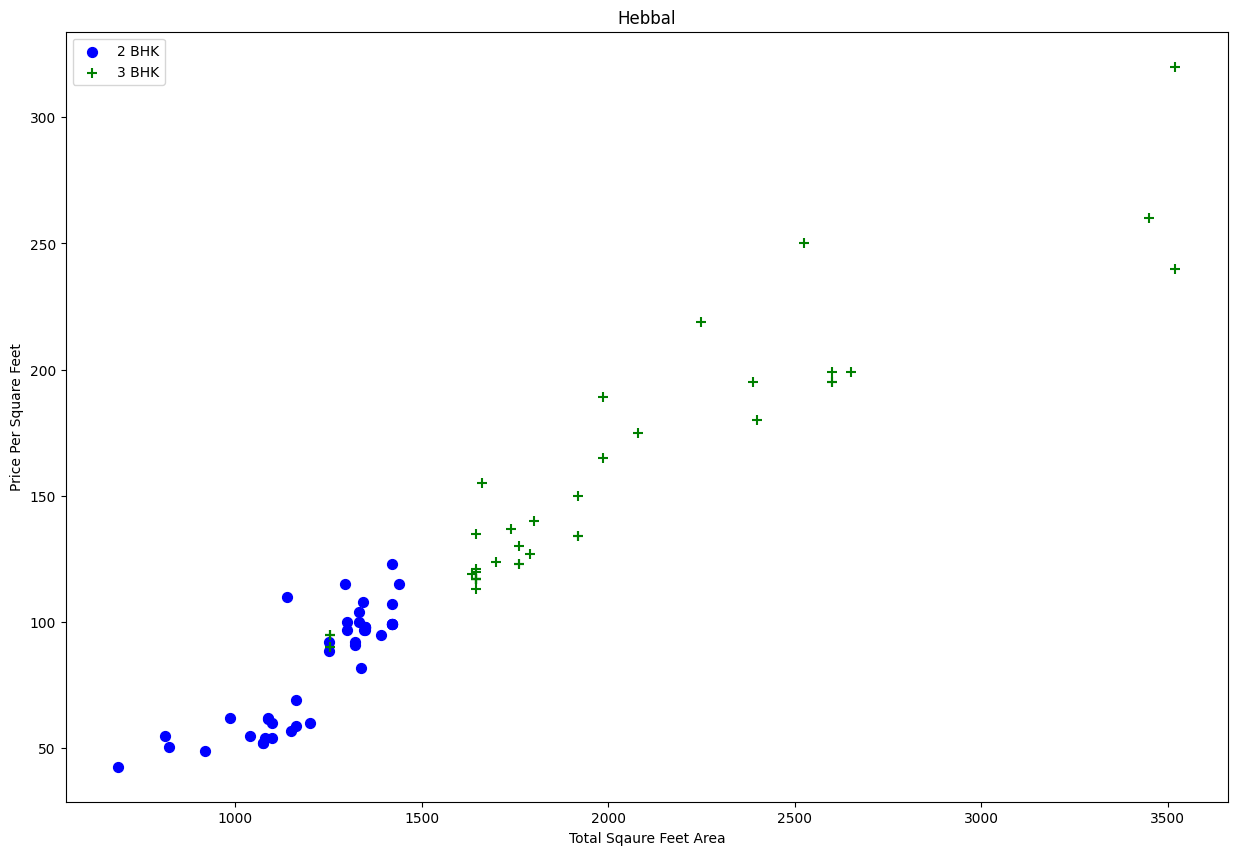

In [46]:
plot_scatter_chart(df8 , 'Hebbal')

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

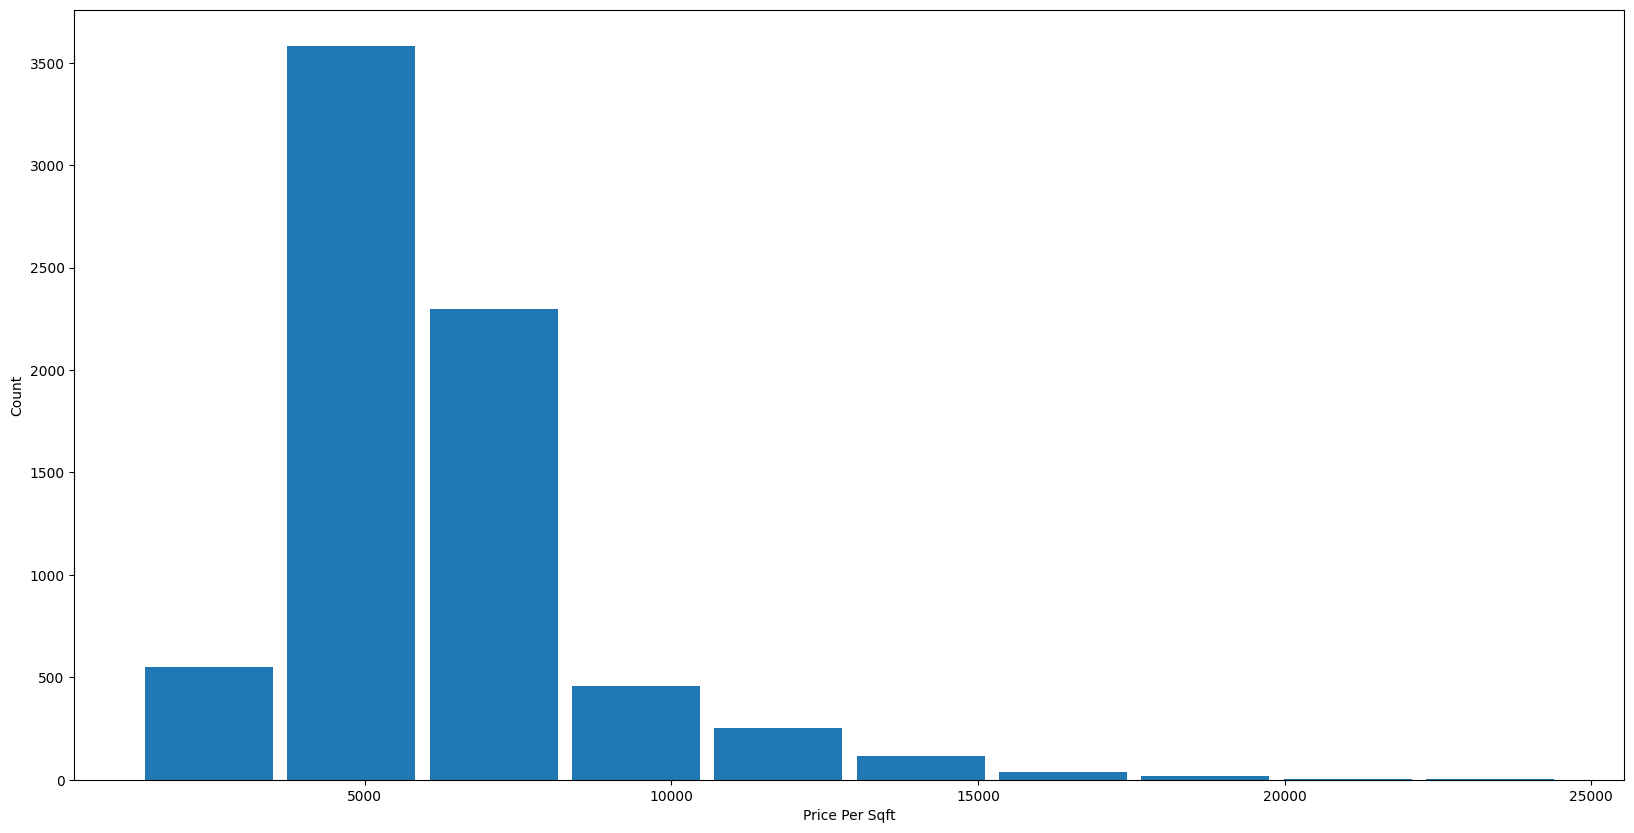

In [47]:
# import matplotlib
matplotlib.rcParams["figure.figsize"] = (20 , 10)
plt.hist(df8.price_per_sqft, rwidth= 0.9)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Faeture

In [48]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

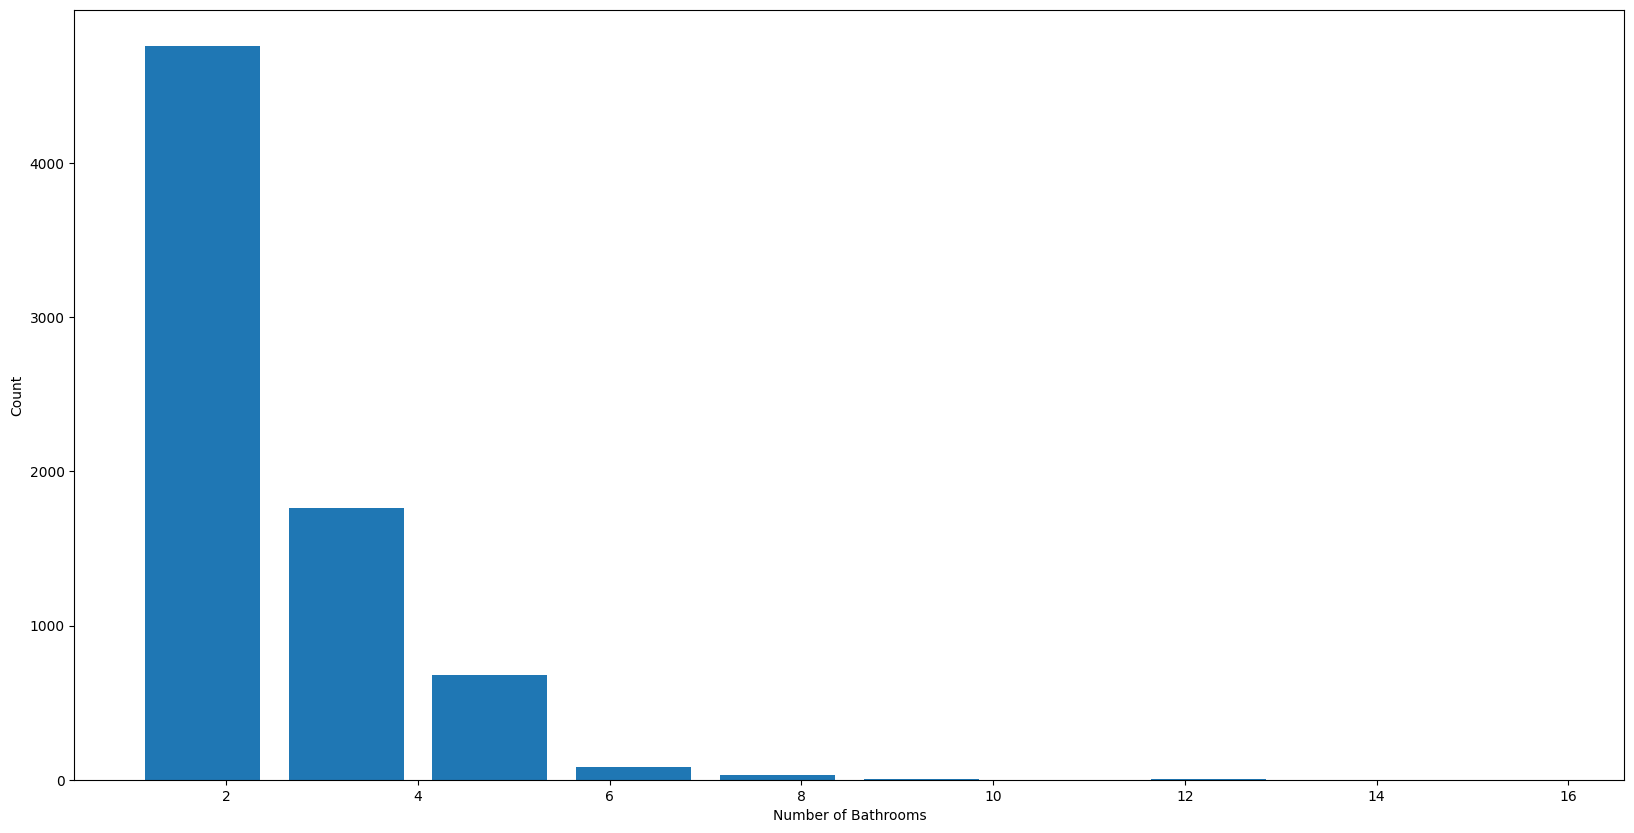

In [49]:
plt.hist(df8.bath , rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [50]:
df8[df8.bath > 10].shape

(5, 6)

it is unsual to have 2 more bathrooms than number of bedrooms in a home

In [51]:
df8[df8.bath > df8.BHK + 2].shape

(4, 6)

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

Here we will remove the tuples which are having number of baths greater than beds + 2 

In [52]:
df9 = df8[df8.bath < df8.BHK + 2]
df9.shape

(7239, 6)

In [53]:
df10 = df9.drop(["price_per_sqft"] , axis= 'columns')
df10.shape

(7239, 5)

### Using One Hot Encoding for Location

In [54]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [55]:
df11 = pd.concat([df10 , dummies.drop('other' , axis= 'columns')] , axis= 'columns') #?????????????
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df12 = df11.drop('location' , axis = 'columns')
df12.shape

(7239, 244)

# Build the Model Now

In [57]:
x = df12.drop('price' , axis='columns') # these are all independent attributes hence with these we will train our model
x

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10234,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10238,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y = df12.price #depended attribute
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7239, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, x_test , y_train , y_test = train_test_split(x , y , test_size =0.2 , random_state = 10)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)
model.score(x_test , y_test)

0.8629132245229454

### Use K Fold cross validation to measure accuracy of our Linear Regression model

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits= 5 , test_size = 0.2 , random_state = 0)
cross_val_score(model , x , y , cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using Grid Search CV

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x , y):
    algos = {
        'Linear_Regression':{
            'model' : model,
            'params': {
                'normalize' : [True , False]
            }
        },
        'Lasso' :{
            'model' : Lasso(),
            'params' :{
                'alpha' : [1,2],
                'selection': ['random' , 'cyclic']
            }
        },
        'decison_tree':{
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter':['best' , 'random']
            }
        }
    }

    score = []
    cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False)
        gs.fit(x , y)
        score.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score ,columns=['model' , 'best_score' , 'best_params'])

In [63]:
find_best_model_using_gridsearchcv(x , y)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

,model,best_score,best_params
0,Linear_Regression,0.847796,{'normalize': False}
1,Lasso,0.726743,"{'alpha': 2, 'selection': 'random'}"
2,decison_tree,0.717148,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


now with the above modulation we can say that the linear regression model is the best suit for our prediction

# Final Prediction Function 

In [64]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [65]:
loc_col = np.where(x.columns == 'BHK')
loc_col

(array([2], dtype=int64),)

In [66]:
loc_col = np.where(x.columns == 'BHK')[0][0]
loc_col

2

In [67]:
# now here we create a function that will give us the prediction of a ceratin house
def predict_value(location , sqft , bath , bhk):
    loc_index = np.where(x.columns == location)[0][0]
    temp = np.zeros(len(x.columns))
    temp[0] = sqft
    temp[1] = bath
    # temp[2] = balcony
    temp[2] = bhk
    if loc_index >= 0:
        temp[loc_index] = 1
    
    return model.predict([temp])[0]

In [68]:
predict_value('1st Phase JP Nagar',1000, 2, 2)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258310395

In [69]:
predict_value('Vijayanagar', 1000, 2, 3)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.20714523968383

In [70]:
predict_value('Indira Nagar', 1000, 2, 2)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179283

In [71]:
predict_value('Indira Nagar', 1000,3,3)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.5268975985407

In [72]:
predict_value('Whitefield', 1200, 3,4)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.46284653979124

In [73]:
import pickle
with open('bangalore_home_price_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [77]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))